<a href="https://colab.research.google.com/github/ThienNguyen27/HousePricePrediction/blob/main/Processing_house_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/HousePricePrediction/house.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,url,price,area,bedrooms,toilets,location,news,level
0,https://batdongsan.vn/luy-ban-bichtan-phu-dien...,Thỏa thuận,96.0,2.0,1.0,TP Hồ Chí Minh,- Diện tích 96m2 ngang 4.3m dài 22.5m . - sổ ...,NaN
1,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3950000000.0,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
2,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3950000000.0,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
3,https://batdongsan.vn/ban-nha-pho-hoang-van-th...,7950000000.0,59.0,4.0,NaN,Hà Nội,+ Chủ nhà cần bán gấp nhà phố Hoàng Văn Thái ...,NaN
4,https://batdongsan.vn/ban-nha-moi-dep-7-x-13-c...,Thỏa thuận,NaN,3.0,3.0,TP Hồ Chí Minh,"✅ BÁN NHÀ MỚI ĐẸP 7 X 13, CHỈ 3.5 TỶ, HẺM XE ...",3.0
...,...,...,...,...,...,...,...,...
495,https://batdongsan.vn/bao-gia-cua-go-mdf-venee...,Thỏa thuận,495.0,NaN,NaN,TP Hồ Chí Minh,Cửa gỗ công nghiệp MDF veneer là sản phẩm đượ...,NaN
496,https://batdongsan.vn/ban-nha-mo-lao-ngo-nong-...,5850000000.0,43.0,NaN,2.0,Hà Nội,+ Nhà cách mặt phố Thanh Bình chỉ vài bước ch...,NaN
497,https://batdongsan.vn/nha-moi-hxh-thong-do-cua...,10990000000.0,50.0,4.0,3.0,TP Hồ Chí Minh,Mô tả: (ĐC Tuấn Kiệt ) +DT đất: 4x12.5m ➡ Khu...,4.0
498,https://batdongsan.vn/can-ban-nha-4-tang-58m2-...,8500000000.0,58.0,5.0,6.0,TP Hồ Chí Minh,Gọi ngay: 0909399906 đi xem nhà rất an ninh l...,NaN


In [6]:

df = df[df.price != 'Thỏa thuận']
df.reset_index(drop=True)
df
# value = df.get(key = 'price')
# i=0
# while i < 40:
#   if value.get(i)== 4700000000.0:
#     print(i)
#     print('match')
#     i+=1
#   else:
#     i+=1
#     print(i)
#     print('mismatch')

#   # print(value.get(i))


# # for i in range(0, 40, +1):
# #     print(value.get(i))
# #     if value.get(i) != 4700000000.0:
# #       print(value.get(i))
# #     else: break
#   # if value.get(i)==4700000000.0:
#   #   print(value)
#   # else: break


,url,price,area,bedrooms,toilets,location,news,level
1,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3950000000.0,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
2,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3950000000.0,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
3,https://batdongsan.vn/ban-nha-pho-hoang-van-th...,7950000000.0,59.0,4.0,NaN,Hà Nội,+ Chủ nhà cần bán gấp nhà phố Hoàng Văn Thái ...,NaN
5,https://batdongsan.vn/sieu-pham-chao-ban-can-b...,17000000000.0,425.0,6.0,6.0,Hải Phòng,SIÊU PHẨM Chào bán căn Biệt Thự mặt đường Lê ...,NaN
6,https://batdongsan.vn/ban-nha-mat-tien-duong-k...,19000000000.0,180.0,NaN,NaN,TP Hồ Chí Minh,"Bán Nhà Mặt tiền đường Kha Vạn Cân, P. Linh Đ...",NaN
...,...,...,...,...,...,...,...,...
494,https://batdongsan.vn/giam-12-ty-ban-nha-lac-l...,4540000000.0,56.0,NaN,NaN,TP Hồ Chí Minh,"NHÀ MỚI, DIỆN TÍCH LỚN - 56M2 - 4 TỶ NHỈNH - ...",NaN
496,https://batdongsan.vn/ban-nha-mo-lao-ngo-nong-...,5850000000.0,43.0,NaN,2.0,Hà Nội,+ Nhà cách mặt phố Thanh Bình chỉ vài bước ch...,NaN
497,https://batdongsan.vn/nha-moi-hxh-thong-do-cua...,10990000000.0,50.0,4.0,3.0,TP Hồ Chí Minh,Mô tả: (ĐC Tuấn Kiệt ) +DT đất: 4x12.5m ➡ Khu...,4.0
498,https://batdongsan.vn/can-ban-nha-4-tang-58m2-...,8500000000.0,58.0,5.0,6.0,TP Hồ Chí Minh,Gọi ngay: 0909399906 đi xem nhà rất an ninh l...,NaN


In [7]:
# change 3.6 thousand to 3.6 billion: Chí thiện SOS
df = df[df.price != '3.6 nghìn']

In [8]:
# Q1 = df.get(key = 'price').quantile(0.25)
# Q3 = df.price.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
df["price"] = pd.to_numeric(df["price"])
Q1 = df['price'].quantile(0)
Q3 = df['price'].quantile(.9)
df = df[df['price'].between(Q1, Q3)]
df

# df.shape


,url,price,area,bedrooms,toilets,location,news,level
1,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3.950000e+09,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
2,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3.950000e+09,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
3,https://batdongsan.vn/ban-nha-pho-hoang-van-th...,7.950000e+09,59.0,4.0,NaN,Hà Nội,+ Chủ nhà cần bán gấp nhà phố Hoàng Văn Thái ...,NaN
5,https://batdongsan.vn/sieu-pham-chao-ban-can-b...,1.700000e+10,425.0,6.0,6.0,Hải Phòng,SIÊU PHẨM Chào bán căn Biệt Thự mặt đường Lê ...,NaN
7,https://batdongsan.vn/ban-nha-au-co-tay-ho-42m...,5.290000e+09,42.0,4.0,3.0,Hà Nội,"Bán nhà Âu Cơ-Tây Hồ 42m, NGÕ THÔNG, DÂN XÂY ...",NaN
...,...,...,...,...,...,...,...,...
494,https://batdongsan.vn/giam-12-ty-ban-nha-lac-l...,4.540000e+09,56.0,NaN,NaN,TP Hồ Chí Minh,"NHÀ MỚI, DIỆN TÍCH LỚN - 56M2 - 4 TỶ NHỈNH - ...",NaN
496,https://batdongsan.vn/ban-nha-mo-lao-ngo-nong-...,5.850000e+09,43.0,NaN,2.0,Hà Nội,+ Nhà cách mặt phố Thanh Bình chỉ vài bước ch...,NaN
497,https://batdongsan.vn/nha-moi-hxh-thong-do-cua...,1.099000e+10,50.0,4.0,3.0,TP Hồ Chí Minh,Mô tả: (ĐC Tuấn Kiệt ) +DT đất: 4x12.5m ➡ Khu...,4.0
498,https://batdongsan.vn/can-ban-nha-4-tang-58m2-...,8.500000e+09,58.0,5.0,6.0,TP Hồ Chí Minh,Gọi ngay: 0909399906 đi xem nhà rất an ninh l...,NaN


In [9]:
# Collecting missing value from news
df.isnull().sum()

# Info about area,  bedrooms, toilets

# If these info exist in the news, try to collect it, but if it does not remove the column

url           0
price         0
area          4
bedrooms     72
toilets     118
location      0
news          0
level       284
dtype: int64

In [10]:
# df = df.drop('toilets', axis = 1) # missing a lot of toilet value, and only a few news provide info about toilets (around 20%) --> drop
df

,url,price,area,bedrooms,toilets,location,news,level
1,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3.950000e+09,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
2,https://batdongsan.vn/ban-nha-trong-ngo-le-tro...,3.950000e+09,40.0,4.0,3.0,Hà Nội,- Vị trí khu vực trung tâm phường La Khê- Hà ...,NaN
3,https://batdongsan.vn/ban-nha-pho-hoang-van-th...,7.950000e+09,59.0,4.0,NaN,Hà Nội,+ Chủ nhà cần bán gấp nhà phố Hoàng Văn Thái ...,NaN
5,https://batdongsan.vn/sieu-pham-chao-ban-can-b...,1.700000e+10,425.0,6.0,6.0,Hải Phòng,SIÊU PHẨM Chào bán căn Biệt Thự mặt đường Lê ...,NaN
7,https://batdongsan.vn/ban-nha-au-co-tay-ho-42m...,5.290000e+09,42.0,4.0,3.0,Hà Nội,"Bán nhà Âu Cơ-Tây Hồ 42m, NGÕ THÔNG, DÂN XÂY ...",NaN
...,...,...,...,...,...,...,...,...
494,https://batdongsan.vn/giam-12-ty-ban-nha-lac-l...,4.540000e+09,56.0,NaN,NaN,TP Hồ Chí Minh,"NHÀ MỚI, DIỆN TÍCH LỚN - 56M2 - 4 TỶ NHỈNH - ...",NaN
496,https://batdongsan.vn/ban-nha-mo-lao-ngo-nong-...,5.850000e+09,43.0,NaN,2.0,Hà Nội,+ Nhà cách mặt phố Thanh Bình chỉ vài bước ch...,NaN
497,https://batdongsan.vn/nha-moi-hxh-thong-do-cua...,1.099000e+10,50.0,4.0,3.0,TP Hồ Chí Minh,Mô tả: (ĐC Tuấn Kiệt ) +DT đất: 4x12.5m ➡ Khu...,4.0
498,https://batdongsan.vn/can-ban-nha-4-tang-58m2-...,8.500000e+09,58.0,5.0,6.0,TP Hồ Chí Minh,Gọi ngay: 0909399906 đi xem nhà rất an ninh l...,NaN


In [11]:
df['toilets'] = df['toilets'].fillna(
  df['toilets'].mean())

df['bedrooms'] = df['bedrooms'].fillna(
  df['bedrooms'].mean())



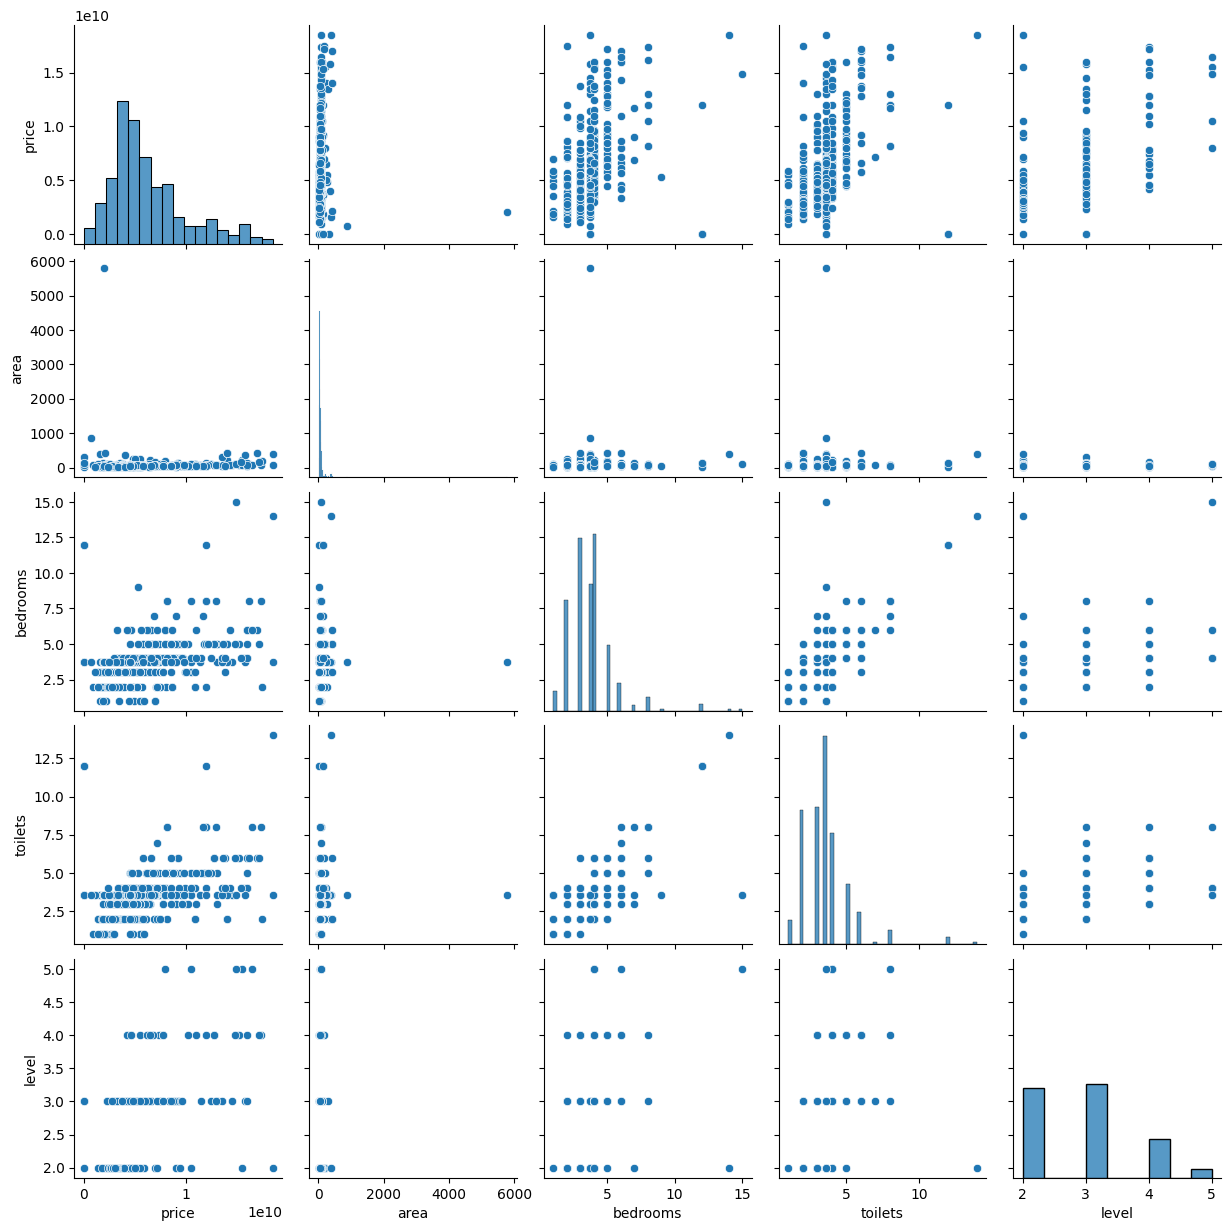

In [12]:
sns.pairplot(df)
plt.show()


In [13]:
df = df.dropna()
df

,url,price,area,bedrooms,toilets,location,news,level
11,https://batdongsan.vn/sat-mat-tien-bach-dang-p...,4.000000e+09,33.0,3.0,3.000000,TP Hồ Chí Minh,- Hiện có dòng tiền 15 triệu/tháng - Kết cấu...,3.0
18,https://batdongsan.vn/nha-mat-tien-khu-sam-uat...,1.280000e+10,75.0,5.0,6.000000,TP Hồ Chí Minh,+ Vị trí : Mặt tiền ngay trục đường kinh doan...,4.0
22,https://batdongsan.vn/nha-chinh-chu-hem-taxi-m...,3.400000e+09,110.0,4.0,3.000000,TP Hồ Chí Minh,"+ Nhà chính chủ, đẹp lung linh. Chỉ cần xách ...",3.0
25,https://batdongsan.vn/giam-sau-17-ty-nhinh-8-t...,8.990000e+09,85.0,7.0,3.000000,TP Hồ Chí Minh,- Vị trí : ngay góc 2 mặt tiền đường 12m khôn...,2.0
27,https://batdongsan.vn/hem-xe-hoi-nha-dep-lung-...,7.390000e+09,53.0,4.0,4.000000,TP Hồ Chí Minh,"- Vị trí xe hơi đỗ cửa ngay PHAN HUY ÍCH, giá...",3.0
...,...,...,...,...,...,...,...,...
471,https://batdongsan.vn/hxh-1-sec-duong-so-3-phu...,4.500000e+09,42.0,2.0,2.000000,TP Hồ Chí Minh,MS 29923 * Vị trí: gần UB phường 9. Đường Số ...,3.0
474,https://batdongsan.vn/ban-nha-hxh-lac-long-qua...,4.800000e+09,55.0,4.0,3.000000,TP Hồ Chí Minh,Mô tả: ???? Kết cấu: 1 trệt 2 lầu sân thượng...,3.0
487,https://batdongsan.vn/ban-khach-san-duong-1c-k...,1.490000e+10,100.0,15.0,3.579125,TP Hồ Chí Minh,"- Giá : 14,9 tỷ - Diện tích : 5 x 20m, - Kết ...",5.0
492,https://batdongsan.vn/ban-gap-nha-mt-kinh-doan...,1.600000e+10,93.0,4.0,5.000000,TP Hồ Chí Minh,"Bán gấp Nhà MT kinh doanh, P. Trường Thọ Thủ ...",4.0


In [14]:
# # Collecting area info from news
# bedroom = df[df.bedrooms.isnull()]
# bedroom



In [15]:
df.shape

(129, 8)

In [16]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<ipython-input-17-8b69fd96db0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

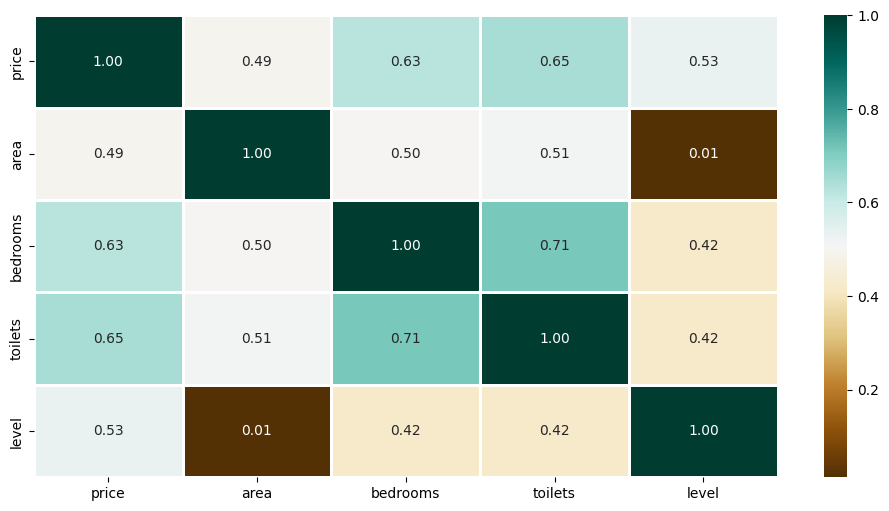

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [18]:
model_df = df.drop(['news', 'location','url'], axis = 1)
model_df


,price,area,bedrooms,toilets,level
11,4.000000e+09,33.0,3.0,3.000000,3.0
18,1.280000e+10,75.0,5.0,6.000000,4.0
22,3.400000e+09,110.0,4.0,3.000000,3.0
25,8.990000e+09,85.0,7.0,3.000000,2.0
27,7.390000e+09,53.0,4.0,4.000000,3.0
...,...,...,...,...,...
471,4.500000e+09,42.0,2.0,2.000000,3.0
474,4.800000e+09,55.0,4.0,3.000000,3.0
487,1.490000e+10,100.0,15.0,3.579125,5.0
492,1.600000e+10,93.0,4.0,5.000000,4.0


Build deep learning model

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

dataset = model_df.values
dataset

array([[4.00000000e+09, 3.30000000e+01, 3.00000000e+00, 3.00000000e+00,
        3.00000000e+00],
       [1.28000000e+10, 7.50000000e+01, 5.00000000e+00, 6.00000000e+00,
        4.00000000e+00],
       [3.40000000e+09, 1.10000000e+02, 4.00000000e+00, 3.00000000e+00,
        3.00000000e+00],
       [8.99000000e+09, 8.50000000e+01, 7.00000000e+00, 3.00000000e+00,
        2.00000000e+00],
       [7.39000000e+09, 5.30000000e+01, 4.00000000e+00, 4.00000000e+00,
        3.00000000e+00],
       [9.39000000e+09, 8.00000000e+01, 5.00000000e+00, 5.00000000e+00,
        2.00000000e+00],
       [2.18000000e+09, 5.50000000e+01, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00],
       [1.58000000e+10, 8.00000000e+01, 4.00000000e+00, 4.00000000e+00,
        3.00000000e+00],
       [9.20000000e+09, 1.38000000e+02, 5.00000000e+00, 6.00000000e+00,
        3.00000000e+00],
       [9.20000000e+09, 1.38000000e+02, 5.00000000e+00, 6.00000000e+00,
        3.00000000e+00],
       [6.10000000e+09, 5.7000

In [20]:
# split dataset into independent and dependent
X = dataset[:,1:4]
Y = dataset[:,0]
X

array([[ 33.        ,   3.        ,   3.        ],
       [ 75.        ,   5.        ,   6.        ],
       [110.        ,   4.        ,   3.        ],
       [ 85.        ,   7.        ,   3.        ],
       [ 53.        ,   4.        ,   4.        ],
       [ 80.        ,   5.        ,   5.        ],
       [ 55.        ,   2.        ,   2.        ],
       [ 80.        ,   4.        ,   4.        ],
       [138.        ,   5.        ,   6.        ],
       [138.        ,   5.        ,   6.        ],
       [ 57.        ,   4.        ,   3.        ],
       [ 31.        ,   4.        ,   3.        ],
       [ 80.        ,   4.        ,   5.        ],
       [150.        ,   3.        ,   3.        ],
       [ 71.        ,   3.74052478,   3.57912458],
       [ 75.        ,   5.        ,   6.        ],
       [ 75.        ,   5.        ,   3.        ],
       [ 53.        ,   3.        ,   3.        ],
       [ 58.        ,   3.        ,   3.        ],
       [ 36.        ,   2.     

In [21]:
# Convert the feature value into in range 0 to 1
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale


array([[0.03926702, 0.14285714, 0.15384615],
       [0.14921466, 0.28571429, 0.38461538],
       [0.2408377 , 0.21428571, 0.15384615],
       [0.17539267, 0.42857143, 0.15384615],
       [0.09162304, 0.21428571, 0.23076923],
       [0.16230366, 0.28571429, 0.30769231],
       [0.09685864, 0.07142857, 0.07692308],
       [0.16230366, 0.21428571, 0.23076923],
       [0.31413613, 0.28571429, 0.38461538],
       [0.31413613, 0.28571429, 0.38461538],
       [0.10209424, 0.21428571, 0.15384615],
       [0.03403141, 0.21428571, 0.15384615],
       [0.16230366, 0.21428571, 0.30769231],
       [0.34554974, 0.14285714, 0.15384615],
       [0.13874346, 0.19575177, 0.1983942 ],
       [0.14921466, 0.28571429, 0.38461538],
       [0.14921466, 0.28571429, 0.15384615],
       [0.09162304, 0.14285714, 0.15384615],
       [0.10471204, 0.14285714, 0.15384615],
       [0.04712042, 0.07142857, 0.07692308],
       [0.09685864, 0.28571429, 0.30769231],
       [0.05759162, 0.07142857, 0.07692308],
       [0.

In [22]:
# Split data 80% train 20% test
# Total 336 dataset: 268 train, 34 test, 34 test
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale,Y,test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(103, 3) (13, 3) (13, 3) (103,) (13,) (13,)


Testing on SVM and RandomForest

SVM

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))


0.2772773357792252


RandomForest

0.3532751887964726

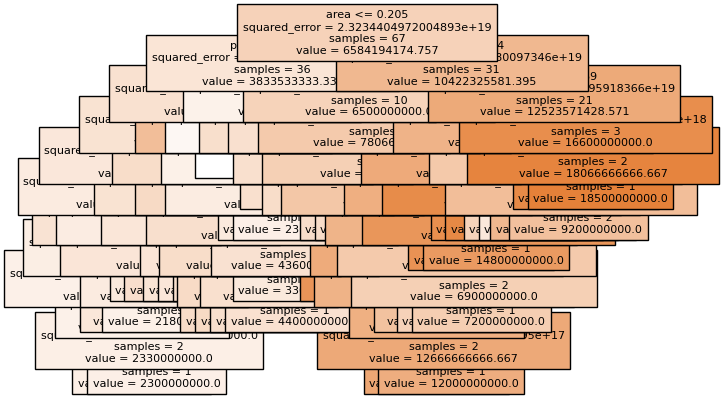

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)

from sklearn import tree

rf = model_RFR
# plt.figure(figsize=(20,15))
tree.plot_tree(rf.estimators_[2], fontsize=8, feature_names=model_df.columns , filled=True)
mean_absolute_percentage_error(Y_test, Y_pred)